<h1> Lecture 14A

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul>
<li>Models of Randomness (Chance)   </li><br>
            
<li>Is the model consistent with the Data?  </li><br>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
from IPython.display import Image

SLIDE: Assessing Models

## Dreaming of better days

<h3>Make an array that contains the population proportions: 5% Ender Pearl, and 95% Other.</h3>

In [2]:
population_proportions = make_array(0.05, .95)
population_proportions

array([0.05, 0.95])

<h3> Now we take 262 samples from the population. </h3>

In [3]:
sample_proportions(262, population_proportions)

array([0.03816794, 0.96183206])

<h4>Run the cell above many times to see how the numbers change, if by much. </h4>

In [4]:
def proportions():
    return sample_proportions(262, population_proportions)

In [5]:
proportions()

array([0.02671756, 0.97328244])

<h3>We need only the first number in the array&mdash;that is, the fraction of ender pearls we receive in the sample.</h3>

In [6]:
def ep_proportion():
    return sample_proportions(262, population_proportions).item(0) 

In [7]:
ep_proportion()

0.04198473282442748

In [8]:
#Specify the number of trials---that is, the number of times we take a sample
num_simulations = 1000

num_eps = make_array()

for i in np.arange(num_simulations):
    num_ep = ep_proportion() * 262 # Multiplication by 262 converts the fraction to an integer
    num_eps = np.append(num_eps, num_ep)
num_eps

array([15., 15., 18., 10., 10., 10.,  9., 12., 18., 16., 17., 14., 15.,
       21., 16., 12., 20., 11.,  9., 11., 20., 24.,  9., 20.,  9.,  7.,
       16., 19., 12., 18., 15.,  7.,  9., 17., 17., 15., 15., 14., 11.,
       16., 14., 12., 18.,  9., 15., 17., 17., 15., 10., 13.,  9., 13.,
       11., 11., 15., 18., 12., 13., 15., 14., 11., 12., 12., 11.,  7.,
        8., 10., 17., 10., 14., 13., 11., 14., 14., 16., 14., 10., 11.,
        9., 15., 18., 13., 13., 10., 13., 13., 14.,  6., 13.,  9., 15.,
       11., 15.,  9., 13., 14., 18., 13., 14., 14., 11., 16., 17., 18.,
       11., 14.,  5., 13., 14., 12.,  7., 16.,  8., 14., 15., 14.,  7.,
       16., 15., 11., 12., 12., 17., 18., 13., 14.,  7., 10., 14., 13.,
       14., 13.,  9.,  7.,  7., 15.,  9.,  9., 15., 10., 14., 11.,  5.,
       12., 11., 16., 14., 12.,  6., 11., 12.,  9., 13., 16., 22., 13.,
        8., 15., 19., 11., 13., 15.,  9., 13., 16., 16., 22.,  8., 14.,
       13., 14.,  9., 10., 14., 10., 19., 15., 19., 16., 10., 17

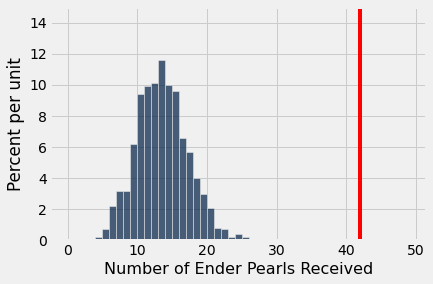

In [9]:
Table().with_column('Number of Ender Pearls Received', \
                    num_eps)\
        .hist(bins=np.arange(0, 50))

# out of scope (plots the observed value which was 42!)
plots.plot([42,42], [0,0.15], c="r");
plots.ylim([0, 0.15]);

In [10]:
## Does that seem realistic?
## Questions
## Slides

## Mendel and Pea Flowers ##

In [11]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [12]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.7212056, 0.2787944])

In [13]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [14]:
purple_flowers()

74.48869752421959

In [15]:
num_simulations=1000

purples = make_array()

for i in np.arange(num_simulations):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

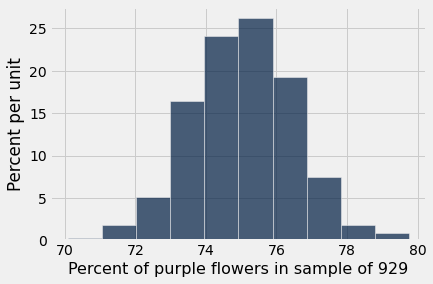

In [16]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

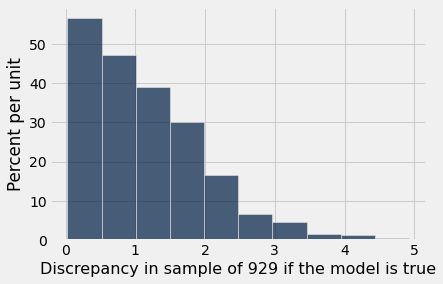

In [17]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

<h3>How close was Mendel's sample to the model's prediction?</h3>

In [18]:
abs(observed_purples * 100 - 75)

1.318622174381062

<h1> Lecture 14B

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul> 
<li>Comparing Distributions  </li><br>

<li>Hypothesis Testing  </li><br>
</ul>
</b>
</h3>

In [19]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
from IPython.display import Image

<h2> Haribo Gummy Bears </h2>

<h3> In this case, we have more than two categories. How would we calculate a test statistic for that? </h3>

In [20]:
bears = Table().with_columns(
    'Flavor', make_array('Strawberry', 'Lemon', 'Orange', 'Raspberry', 'Pineapple'),
    'Expected', make_array(0.2, 0.2, 0.2, 0.2, 0.2),
    'Observed', make_array(15/60, 10/60, 7/60, 17/60, 11/60)
)

bears

Flavor,Expected,Observed
Strawberry,0.2,0.25
Lemon,0.2,0.166667
Orange,0.2,0.116667
Raspberry,0.2,0.283333
Pineapple,0.2,0.183333


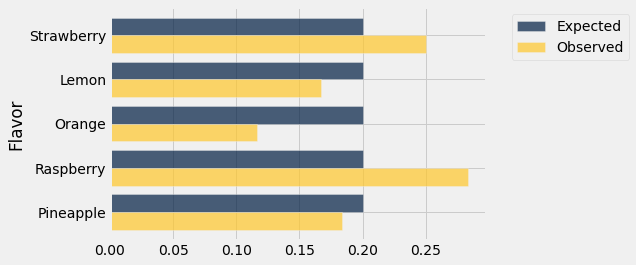

In [21]:
bears.barh('Flavor')

In [22]:
model = make_array(0.2, 0.2, 0.2, 0.2, 0.2)
model

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [23]:
simulation = sample_proportions(60, model)
simulation

array([0.18333333, 0.21666667, 0.18333333, 0.18333333, 0.23333333])

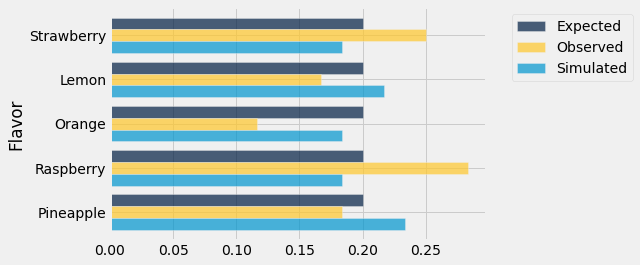

In [24]:
bears.with_column("Simulated", simulation).barh("Flavor")

<h2> Distance Between Distributions </h2>

In [25]:
# Earlier, the difference between observed purple flowers
# and the expected values (75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differs from its expected value according to the model.

diffs = bears.column('Observed') - bears.column('Expected')
bears_with_difference = bears.with_column('Difference', diffs)
bears_with_difference

Flavor,Expected,Observed,Difference
Strawberry,0.2,0.25,0.05
Lemon,0.2,0.166667,-0.0333333
Orange,0.2,0.116667,-0.0833333
Raspberry,0.2,0.283333,0.0833333
Pineapple,0.2,0.183333,-0.0166667


In [26]:
np.sum(bears_with_difference.column('Difference'))

-8.326672684688674e-17

This is zero, for all intents and purposes. 

In [27]:
np.sum(abs(bears_with_difference.column('Difference')))/2

0.13333333333333336

Why do we divide by 2?

In [28]:
example1 = Table().with_columns(
    'Example', make_array('Category 1', 'Category 2', 'Category 3'),
    'Expected', make_array(1/3, 1/3, 1/3),
    'Observed', make_array(1/3, 1/3, 1/3)
)
example1

Example,Expected,Observed
Category 1,0.333333,0.333333
Category 2,0.333333,0.333333
Category 3,0.333333,0.333333


In [29]:
sum(abs(example1.column('Observed') -  example1.column('Expected')))

0.0

In [30]:
example2 = Table().with_columns(
    'Example', make_array('Category 1', 'Category 2', 'Category 3'),
    'Expected', make_array(0, 1, 0),
    'Observed', make_array(1, 0, 0)
)
example2

Example,Expected,Observed
Category 1,0,1
Category 2,1,0
Category 3,0,0


In [31]:
sum(abs(example2.column('Observed') -  example2.column('Expected')))

2

In [32]:
bears_with_difference

Flavor,Expected,Observed,Difference
Strawberry,0.2,0.25,0.05
Lemon,0.2,0.166667,-0.0333333
Orange,0.2,0.116667,-0.0833333
Raspberry,0.2,0.283333,0.0833333
Pineapple,0.2,0.183333,-0.0166667


In [33]:
np.sum(abs(bears_with_difference.column("Difference")))

0.2666666666666667

In [34]:
0.05 + 0.0833333 #sum of positive entries

0.1333333

In [35]:
-0.0333333 - 0.0833333 - 0.0166667 # sum of negative entries

-0.13333330000000002

In [36]:
np.sum(abs(bears_with_difference.column('Difference')))/2

0.13333333333333336

## Total Variation Distance

In [37]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [38]:
# The TVD of our observed data from their expected values
# assuming the model is true
observed_stat = tvd(bears.column('Observed'), bears.column('Expected'))
observed_stat

0.13333333333333336

Same value we got previously. 

<h3>Let's do the same comparison with the simulated distribution:</h3>

In [39]:
model = make_array(0.2, 0.2, 0.2, 0.2, 0.2)

In [40]:
sample_proportions(60, model)

array([0.08333333, 0.13333333, 0.28333333, 0.23333333, 0.26666667])

In [41]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(60, model), bears.column('Expected'))

0.05

In [42]:
def simulated_tvd():
    return tvd(sample_proportions(60, model), model)

In [43]:
tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)
tvds

array([0.08333333, 0.13333333, 0.13333333, ..., 0.15      , 0.2       ,
       0.13333333])

Observed TVD: 0.13333333333333336


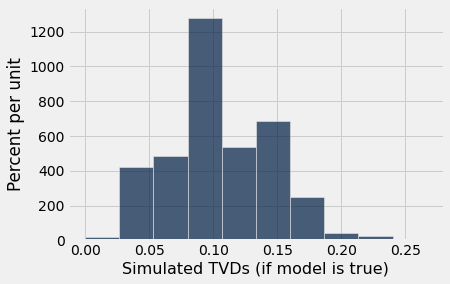

In [44]:
title = 'Simulated TVDs (if model is true)'

Table().with_column(title, tvds).hist()
print('Observed TVD: ' + str(observed_stat))